In [1]:
# import statements
import pandas as pd
import pickle
import joblib
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g_l3YO6rG0VR_vJWOqNzrmx4QVFVaijJFfCHP4acS4-U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelaypred-donotdelete-pr-cojz5yzjmekofw'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g_l3YO6rG0VR_vJWOqNzrmx4QVFVaijJFfCHP4acS4-U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelaypred-donotdelete-pr-cojz5yzjmekofw'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()

ModuleNotFoundError: No module named 'botocore'

In [4]:
# read dataset
# dataset = pd.read_csv('flightdata.csv')
# dataset.head()

In [22]:
dataset.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [23]:
dataset.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
Unnamed: 25            float64
dtype: object

VISUALIZATION OF DATA

In [24]:
# removing irrelevant data
dataset = dataset.drop(['Unnamed: 25', 'UNIQUE_CARRIER'], axis=1)

In [25]:
# find exact value counts of all fields
cat_cols = dataset.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    dataset[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))


counts
column   value         
DEST     JFK       1312
         SEA       1994
         DTW       2211
         MSP       2493
         ATL       3221
...                 ...
TAIL_NUM N582NW      72
         N584NW      72
         N581NW      73
         N856DN      75
         N857DZ      76

[799 rows x 1 columns]

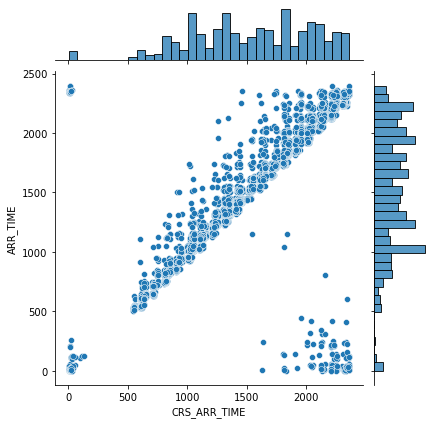

In [26]:
#plotting correlations (implication - almost linear relationship)
sb.jointplot(data=dataset, x="CRS_ARR_TIME", y="ARR_TIME")

In [28]:
# creating a copy of the dataset for visualization

dataset_visualization = dataset.copy()

In [29]:
dataset_visualization.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
dtype: object

In [30]:
# convert all object data to numeric values to visualize on heatmap

list_str_obj_cols = dataset_visualization.columns[dataset_visualization.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    dataset_visualization[str_obj_col] = pd.to_numeric(dataset_visualization[str_obj_col], errors='coerce') 
dataset_visualization.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
TAIL_NUM               float64
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                 float64
DEST_AIRPORT_ID          int64
DEST                   float64
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
dtype: object

<AxesSubplot:>

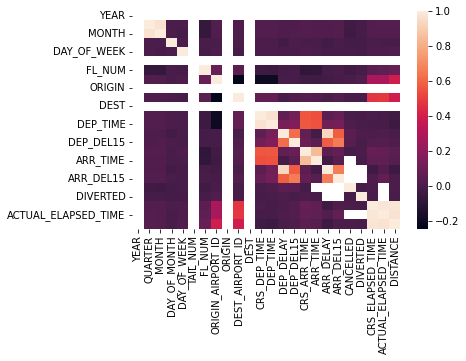

In [31]:
correlations = dataset_visualization.corr()
sb.heatmap(correlations)

In [32]:
# to identify the correlations between arrival delay and other fields
correlations['ARR_DEL15']

YEAR                        NaN
QUARTER                0.023102
MONTH                  0.030161
DAY_OF_MONTH          -0.000597
DAY_OF_WEEK           -0.012063
TAIL_NUM                    NaN
FL_NUM                -0.002378
ORIGIN_AIRPORT_ID     -0.006250
ORIGIN                      NaN
DEST_AIRPORT_ID        0.029525
DEST                        NaN
CRS_DEP_TIME           0.086057
DEP_TIME               0.127593
DEP_DELAY              0.578529
DEP_DEL15              0.658511
CRS_ARR_TIME           0.078282
ARR_TIME               0.042298
ARR_DELAY              0.661322
ARR_DEL15              1.000000
CANCELLED                   NaN
DIVERTED                    NaN
CRS_ELAPSED_TIME       0.015676
ACTUAL_ELAPSED_TIME    0.077741
DISTANCE               0.002870
Name: ARR_DEL15, dtype: float64

DATA PREPROCESSING

In [33]:
# based on the correlation factors
refined_dataset = dataset.drop(['YEAR', 'QUARTER', 'DAY_OF_WEEK', 'TAIL_NUM', 'FL_NUM', 
                                'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_ELAPSED_TIME', 
                                'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'ORIGIN',
                                'DEST', 'ARR_TIME', 'ARR_DELAY'], axis=1)
refined_dataset

,MONTH,DAY_OF_MONTH,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED
0,1,1,1905,1907.0,2.0,0.0,2143,0.0,0.0,0.0
1,1,1,1345,1344.0,-1.0,0.0,1435,0.0,0.0,0.0
2,1,1,940,942.0,2.0,0.0,1215,0.0,0.0,0.0
3,1,1,819,820.0,1.0,0.0,1335,0.0,0.0,0.0
4,1,1,2300,2256.0,-4.0,0.0,607,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11226,12,30,1005,1003.0,-2.0,0.0,1223,0.0,0.0,0.0
11227,12,30,1525,1559.0,34.0,1.0,2046,0.0,0.0,0.0
11228,12,30,1959,1959.0,0.0,0.0,2210,0.0,0.0,0.0
11229,12,30,1530,1529.0,-1.0,0.0,1806,0.0,0.0,0.0


In [34]:
# check datatypes of columns
refined_dataset.dtypes

MONTH             int64
DAY_OF_MONTH      int64
CRS_DEP_TIME      int64
DEP_TIME        float64
DEP_DELAY       float64
DEP_DEL15       float64
CRS_ARR_TIME      int64
ARR_DEL15       float64
CANCELLED       float64
DIVERTED        float64
dtype: object

In [35]:
# finding missing values
refined_dataset.isna().sum()

MONTH             0
DAY_OF_MONTH      0
CRS_DEP_TIME      0
DEP_TIME        107
DEP_DELAY       107
DEP_DEL15       107
CRS_ARR_TIME      0
ARR_DEL15       188
CANCELLED         0
DIVERTED          0
dtype: int64

In [36]:
# imputing missing values with mean
cols = ["DEP_TIME", "DEP_DELAY","DEP_DEL15","ARR_DEL15"]
refined_dataset[cols]=refined_dataset[cols].fillna(refined_dataset.mode().iloc[0])

In [37]:
refined_dataset.isna().sum()

MONTH           0
DAY_OF_MONTH    0
CRS_DEP_TIME    0
DEP_TIME        0
DEP_DELAY       0
DEP_DEL15       0
CRS_ARR_TIME    0
ARR_DEL15       0
CANCELLED       0
DIVERTED        0
dtype: int64

In [38]:
refined_dataset.shape

(11231, 10)

In [39]:
# converting float values to categorical
columns = ['DEP_DEL15', 'CANCELLED', 'DIVERTED', 'ARR_DEL15']
for col in columns:
    refined_dataset[col] = refined_dataset[col].astype('int').astype('category')
refined_dataset.dtypes

MONTH              int64
DAY_OF_MONTH       int64
CRS_DEP_TIME       int64
DEP_TIME         float64
DEP_DELAY        float64
DEP_DEL15       category
CRS_ARR_TIME       int64
ARR_DEL15       category
CANCELLED       category
DIVERTED        category
dtype: object

In [40]:
# converting float values to categorical
columns = ['DEP_TIME', 'DEP_DELAY']
for col in columns:
    refined_dataset[col] = refined_dataset[col].astype('int')
refined_dataset.dtypes

MONTH              int64
DAY_OF_MONTH       int64
CRS_DEP_TIME       int64
DEP_TIME           int64
DEP_DELAY          int64
DEP_DEL15       category
CRS_ARR_TIME       int64
ARR_DEL15       category
CANCELLED       category
DIVERTED        category
dtype: object

PREPARING FOR TRAINING

In [54]:
# split dependent and independent variables
X = refined_dataset[[ 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',     
                  'DEP_DEL15', 'CRS_ARR_TIME']]     
Y = refined_dataset[['ARR_DEL15']]

In [55]:
 # splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train.value_counts()

ARR_DEL15
0            6594
1             930
dtype: int64

In [56]:
# decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier = decision_tree_classifier.fit(X_train,y_train)
decision_tree_prediction = decision_tree_classifier.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(decision_tree_prediction, y_test))
print("Classification report\n", classification_report(decision_tree_prediction, y_test))
print("Accuracy score\n", accuracy_score(decision_tree_prediction, y_test))

Confusion matrix
 [[3108  177]
 [ 154  268]]
Classification report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3285
           1       0.60      0.64      0.62       422

    accuracy                           0.91      3707
   macro avg       0.78      0.79      0.78      3707
weighted avg       0.91      0.91      0.91      3707

Accuracy score
 0.9107094685729701


In [57]:
# svc model
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(SVC_prediction, y_test))
print("Classification report\n", classification_report(SVC_prediction, y_test))
print("Accuracy score\n", accuracy_score(SVC_prediction, y_test))

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix
 [[3258  333]
 [   4  112]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      3591
           1       0.25      0.97      0.40       116

    accuracy                           0.91      3707
   macro avg       0.63      0.94      0.68      3707
weighted avg       0.98      0.91      0.93      3707

Accuracy score
 0.9090909090909091


In [58]:
# knn model
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(KNN_prediction, y_test))
print("Classification report\n", classification_report(KNN_prediction, y_test))
print("Accuracy score\n", accuracy_score(KNN_prediction, y_test))

Confusion matrix
 [[3219  212]
 [  43  233]]
Classification report
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      3431
           1       0.52      0.84      0.65       276

    accuracy                           0.93      3707
   macro avg       0.76      0.89      0.80      3707
weighted avg       0.95      0.93      0.94      3707

Accuracy score
 0.9312112220124089


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [59]:
# gaussian naive bayes model
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
GNB_prediction = GNB_model.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(GNB_prediction, y_test))
print("Classification report\n", classification_report(GNB_prediction, y_test))
print("Accuracy score\n", accuracy_score(GNB_prediction, y_test))

Confusion matrix
 [[3080  101]
 [ 182  344]]
Classification report
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      3181
           1       0.77      0.65      0.71       526

    accuracy                           0.92      3707
   macro avg       0.86      0.81      0.83      3707
weighted avg       0.92      0.92      0.92      3707

Accuracy score
 0.9236579444294578


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
# Logistic Regression

LR_model = LogisticRegression(random_state=0).fit(X_train, y_train)
LR_prediction=LR_model.predict(X_test)
print("Confusion matrix\n", confusion_matrix(LR_prediction, y_test))
print("Classification report\n", classification_report(LR_prediction, y_test))
print("Accuracy score\n", accuracy_score(LR_prediction, y_test))

Confusion matrix
 [[3225  182]
 [  37  263]]
Classification report
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      3407
           1       0.59      0.88      0.71       300

    accuracy                           0.94      3707
   macro avg       0.79      0.91      0.84      3707
weighted avg       0.96      0.94      0.95      3707

Accuracy score
 0.9409225789047747


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
# ensemble model of best 3 peforming model - gnb, knn, svc
ensemble = VotingClassifier(estimators=[('gnb', GNB_model), ('knn', KNN_model), ('lr', LR_model)], voting='hard')
ensemble.fit(X_train, y_train)
ensemble_prediction = ensemble.predict(X_test)
# performance metrics
print("Confusion matrix\n", confusion_matrix(ensemble_prediction, y_test))
print("Classification report\n", classification_report(ensemble_prediction, y_test))
print("Accuracy score\n", accuracy_score(ensemble_prediction, y_test))

Confusion matrix
 [[3213  164]
 [  49  281]]
Classification report
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      3377
           1       0.63      0.85      0.73       330

    accuracy                           0.94      3707
   macro avg       0.81      0.90      0.85      3707
weighted avg       0.95      0.94      0.95      3707

Accuracy score
 0.9425411383868357


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# joblib.dump(ensemble, 'flight.pkl')

IBM DEPLOYMENT

In [63]:
# install ibm-wtason
!pip install -U ibm-watson-machine-learning

In [64]:
from ibm_watson_machine_learning import APIClient
import json

In [65]:
# authenticate api key
wml_credentials = {
    "apikey":"tCzEer0P5KjeQ_Tu6f8W9HK24TQ1Ds_Wi311f1_mS5UI",
    "url": "https://us-south.ml.cloud.ibm.com"
}

In [66]:
wml_client = APIClient(wml_credentials)

In [67]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------  ------------------------
ID                                    NAME             CREATED
5cf09ec2-19e8-4013-952d-667d5df21aa8  flightdelaypred  2022-11-13T08:19:32.253Z
------------------------------------  ---------------  ------------------------


In [68]:
SPACE_ID = "5cf09ec2-19e8-4013-952d-667d5df21aa8"

In [69]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [70]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [71]:
import sklearn
sklearn.__version__

'1.0.2'

In [72]:
MODEL_NAME = 'flightdelaypred'
DEPLOYMENT_NAME = 'flightdelaypred'
DEMO_MODEL = ensemble

In [73]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [74]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [75]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [76]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'a0b8f9c4-c58b-49a0-a89c-d14c40b44906'

In [77]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [78]:
deployment = wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'a0b8f9c4-c58b-49a0-a89c-d14c40b44906' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5691b10e-6100-4415-97cc-bc1e18a14bb8'
------------------------------------------------------------------------------------------------




In [ ]:
https://us-south.ml.cloud.ibm.com/ml/v4/deployments/0b4a580c-18db-4a71-92a9-0d006bd0c06d/predictions?version=2022-11-13